In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('apy.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
# Data Inspection
df.shape

(246091, 7)

In [4]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
#Data Cleaning:  Replace, drop, or impute missing values based on the context and impact on analysis.
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
#Drop null values of production
df = df.dropna(subset=['Production'])
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### QnA about data:
Note: For the Displaying, We displayed only top 10 due to easy to see

#### Since Rice is the popular crop so, we're gonna explore it saperately.

In [9]:
#Which states are the top producers of rice?
df.groupby('State_Name').Production.sum().sort_values(ascending=False).head(10)

State_Name
Kerala                         9.788005e+10
Andhra Pradesh                 1.732459e+10
Tamil Nadu                     1.207644e+10
Uttar Pradesh                  3.234493e+09
Assam                          2.111752e+09
West Bengal                    1.397904e+09
Maharashtra                    1.263641e+09
Karnataka                      8.634298e+08
Andaman and Nicobar Islands    7.182232e+08
Punjab                         5.863850e+08
Name: Production, dtype: float64

<Axes: xlabel='State_Name'>

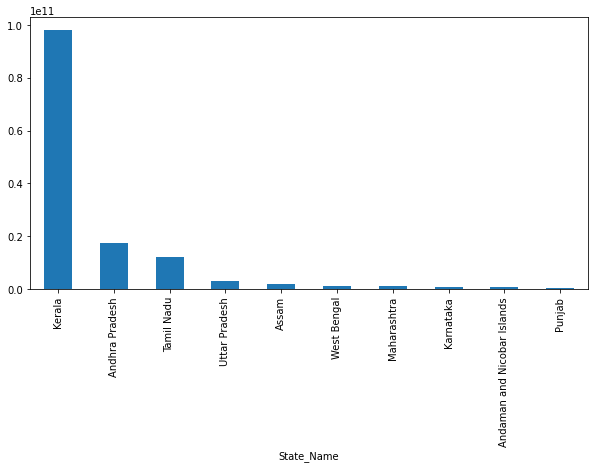

In [10]:
#Plot which states are the top producers of rice?
df.groupby('State_Name').Production.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

In [11]:
#which season is the best for rice production?
df.groupby('Season').Production.sum().sort_values(ascending=False).head(10)

Season
Whole Year     1.344248e+11
Kharif         4.029970e+09
Rabi           2.051688e+09
Winter         4.345498e+08
Summer         1.706579e+08
Autumn         6.441377e+07
Name: Production, dtype: float64

<Axes: xlabel='Season'>

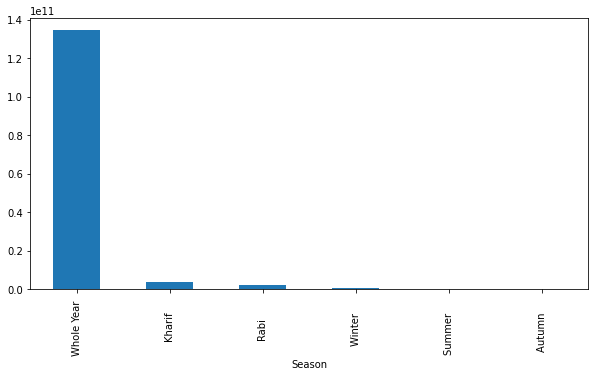

In [12]:
#plot which season is the best for rice production?
df.groupby('Season').Production.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='Crop_Year'>

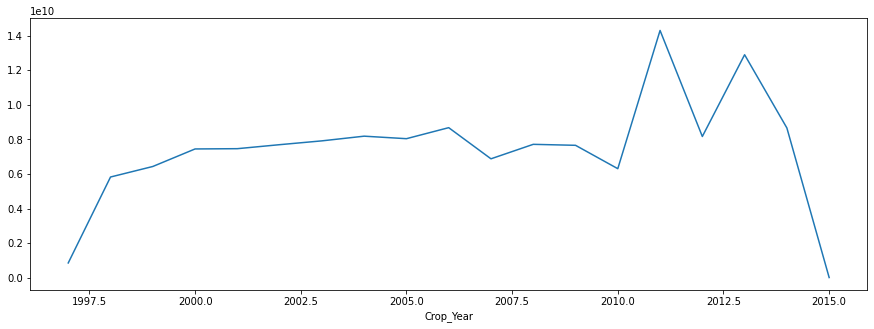

In [13]:
#What is the trend of rice production over different crop years?
df.groupby('Crop_Year').Production.sum().plot(kind='line', figsize=(15,5))

In [14]:
#Is there a correlation between the area cultivated for rice and its production?
df[['Area', 'Production']].corr()

,Area,Production
Area,1.000000,0.040587
Production,0.040587,1.000000


#### Crop-related Questions:

In [15]:
#What are the most commonly cultivated crops across different districts/states?
df.groupby('Crop')['State_Name'].value_counts().sort_values(ascending=False).head(10)

Crop               State_Name   
Maize              Uttar Pradesh    2549
Urad               Uttar Pradesh    1996
Maize              Bihar            1962
Moong(Green Gram)  Uttar Pradesh    1826
Onion              Uttar Pradesh    1736
Rice               Uttar Pradesh    1611
                   Bihar            1601
                   Assam            1356
                   Odisha           1341
Maize              Karnataka        1331
Name: State_Name, dtype: int64

<Axes: xlabel='Crop,State_Name'>

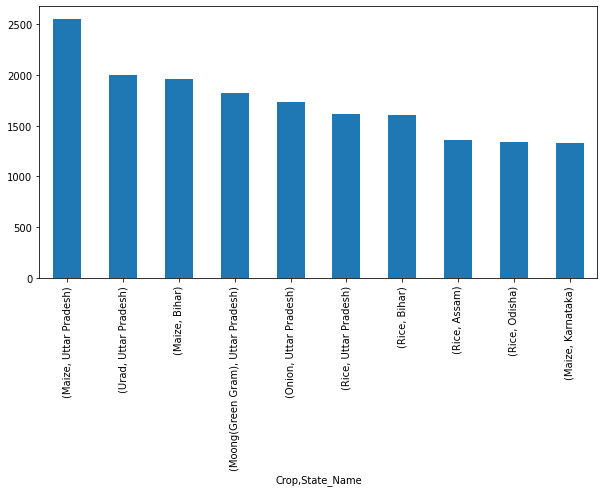

In [16]:
#Plot the most commonly cultivated crops across different districts/states?
df.groupby('Crop')['State_Name'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

In [17]:
#Which crop shows the highest production and yield per unit area?
df.groupby('Crop').Production.sum().sort_values(ascending=False).head(10)

Crop
Coconut         1.299816e+11
Sugarcane       5.535682e+09
Rice            1.605470e+09
Wheat           1.332826e+09
Potato          4.248263e+08
Cotton(lint)    2.970000e+08
Maize           2.733418e+08
Jute            1.815582e+08
Banana          1.461327e+08
Soyabean        1.418372e+08
Name: Production, dtype: float64

<Axes: xlabel='Crop'>

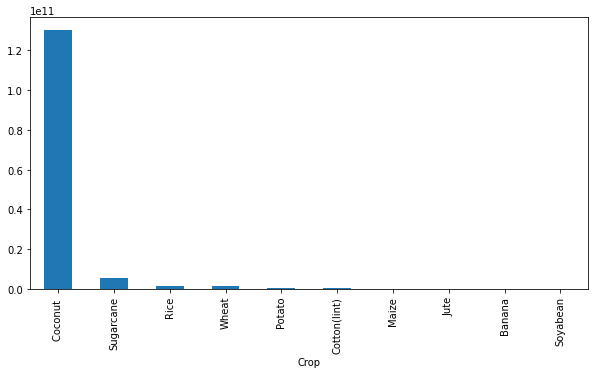

In [18]:
#plot which crop shows the highest production and yield per unit area?
df.groupby('Crop').Production.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

In [19]:
#Is there a seasonal pattern in the cultivation of specific crops?
df.groupby('Season').Crop.value_counts().sort_values(ascending=False).head(10)

Season       Crop             
Rabi         Wheat                7504
Kharif       Maize                7170
Rabi         Gram                 6945
             Rapeseed &Mustard    6933
Kharif       Rice                 6864
             Arhar/Tur            6701
             Sesamum              6305
Whole Year   Sugarcane            6203
Kharif       Urad                 5856
             Moong(Green Gram)    5439
Name: Crop, dtype: int64

<Axes: xlabel='Season,Crop'>

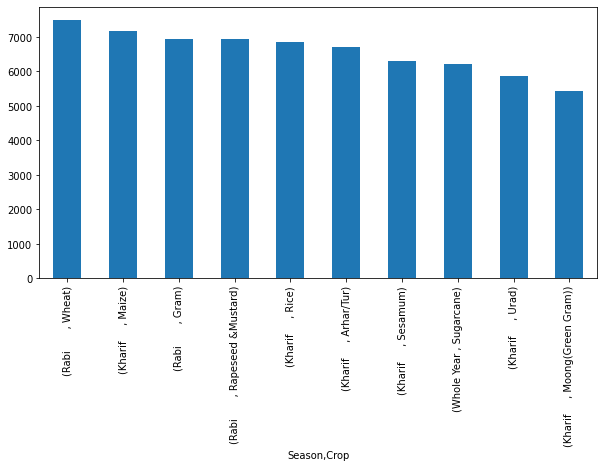

In [20]:
#plot is there a seasonal pattern in the cultivation of specific crops?
df.groupby('Season').Crop.value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

#### Productivity and Area Questions:

In [21]:
#Can we identify areas or districts with high productivity (production per unit area) for certain crops?
df.groupby('State_Name').Area.value_counts().sort_values(ascending=False).head(10)

State_Name     Area  
Maharashtra    100.0     927
Gujarat        100.0     785
Uttar Pradesh  1.0       757
               2.0       630
Maharashtra    200.0     566
Uttar Pradesh  3.0       494
Gujarat        200.0     491
Punjab         1000.0    465
Gujarat        300.0     427
Uttar Pradesh  4.0       395
Name: Area, dtype: int64

<Axes: xlabel='State_Name,Area'>

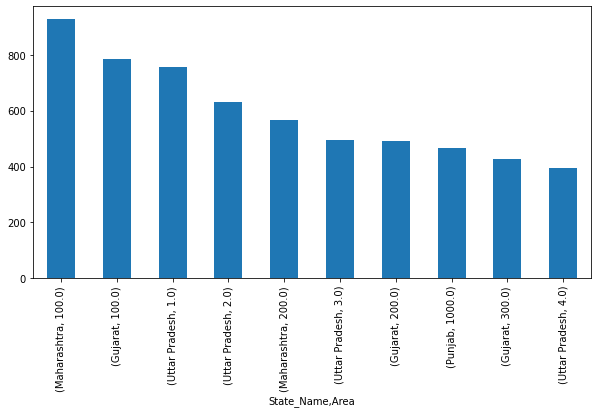

In [22]:
#plot can we identify areas or districts with high productivity (production per unit area) for certain crops?
df.groupby('State_Name').Area.value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

#### Trend Analysis Questions:

In [23]:
#How has the production of major crops changed over the years (Crop Year)?
df.groupby('Crop_Year').Production.sum().sort_values(ascending=False).head(10)

Crop_Year
2011    1.430890e+10
2013    1.290359e+10
2006    8.681913e+09
2014    8.664541e+09
2004    8.189462e+09
2012    8.171055e+09
2005    8.043757e+09
2003    7.917974e+09
2008    7.717018e+09
2002    7.696955e+09
Name: Production, dtype: float64

<Axes: xlabel='Crop_Year'>

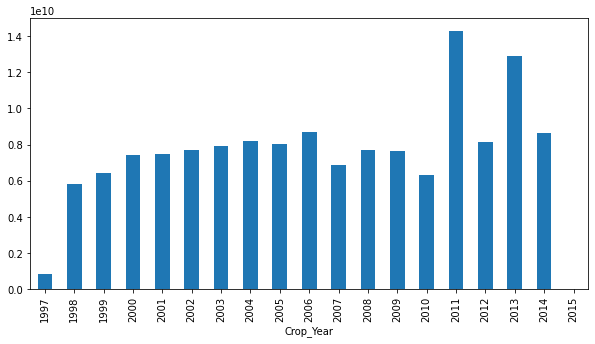

In [24]:
#plot how has the production of major crops changed over the years (Crop Year)?
df.groupby('Crop_Year').Production.sum().plot(kind='bar', figsize=(10,5))

In [25]:
#Are there any observable trends in the cultivation of certain crops across different seasons?
df.groupby('Season').Crop.value_counts().sort_values(ascending=False).head(10)

Season       Crop             
Rabi         Wheat                7504
Kharif       Maize                7170
Rabi         Gram                 6945
             Rapeseed &Mustard    6933
Kharif       Rice                 6864
             Arhar/Tur            6701
             Sesamum              6305
Whole Year   Sugarcane            6203
Kharif       Urad                 5856
             Moong(Green Gram)    5439
Name: Crop, dtype: int64

<Axes: xlabel='Season,Crop'>

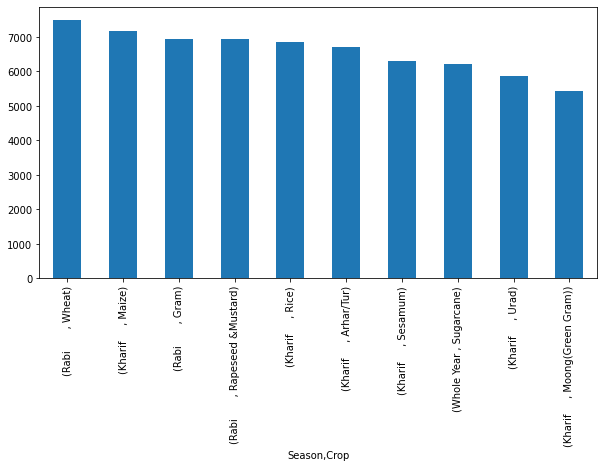

In [26]:
#plot Are there any observable trends in the cultivation of certain crops across different seasons?
df.groupby('Season').Crop.value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

#### Geographical Analysis Questions:

In [27]:
#How does the production and cultivation of crops vary between different states or districts?
df.groupby('State_Name').Production.sum().sort_values(ascending=False).head(10)

State_Name
Kerala                         9.788005e+10
Andhra Pradesh                 1.732459e+10
Tamil Nadu                     1.207644e+10
Uttar Pradesh                  3.234493e+09
Assam                          2.111752e+09
West Bengal                    1.397904e+09
Maharashtra                    1.263641e+09
Karnataka                      8.634298e+08
Andaman and Nicobar Islands    7.182232e+08
Punjab                         5.863850e+08
Name: Production, dtype: float64

<Axes: xlabel='State_Name'>

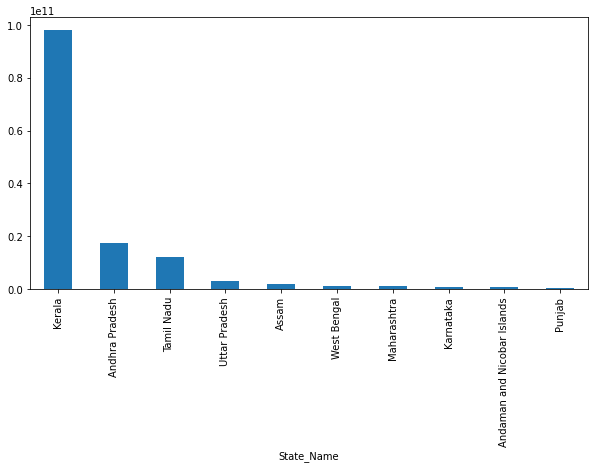

In [28]:
#plot how does the production and cultivation of crops vary between different states or districts?
df.groupby('State_Name').Production.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))	

In [29]:
#Are there specific crops that are more prevalent in certain regions?
df.groupby('State_Name').Crop.value_counts().sort_values(ascending=False).head(10)

State_Name     Crop             
Uttar Pradesh  Maize                2549
               Urad                 1996
Bihar          Maize                1962
Uttar Pradesh  Moong(Green Gram)    1826
               Onion                1736
               Rice                 1611
Bihar          Rice                 1601
Assam          Rice                 1356
Odisha         Rice                 1341
Karnataka      Maize                1331
Name: Crop, dtype: int64

<Axes: xlabel='State_Name,Crop'>

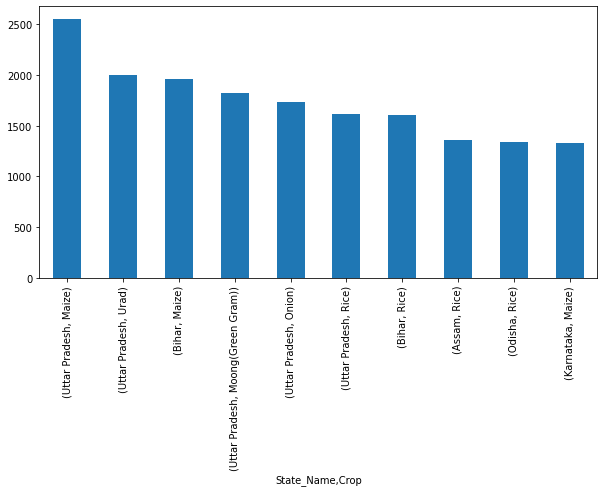

In [30]:
#plot are there specific crops that are more prevalent in certain regions?
df.groupby('State_Name').Crop.value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

#### Comparative Analysis Questions:

In [31]:
#What is the overall trend in the production of different crops? Which crops show an increasing or decreasing trend over time?
df.groupby('Crop').Production.sum().sort_values(ascending=False)

Crop
Coconut               1.299816e+11
Sugarcane             5.535682e+09
Rice                  1.605470e+09
Wheat                 1.332826e+09
Potato                4.248263e+08
                          ...     
Other Citrus Fruit    0.000000e+00
Cucumber              0.000000e+00
Litchi                0.000000e+00
Lab-Lab               0.000000e+00
Apple                 0.000000e+00
Name: Production, Length: 124, dtype: float64

<Axes: xlabel='Crop'>

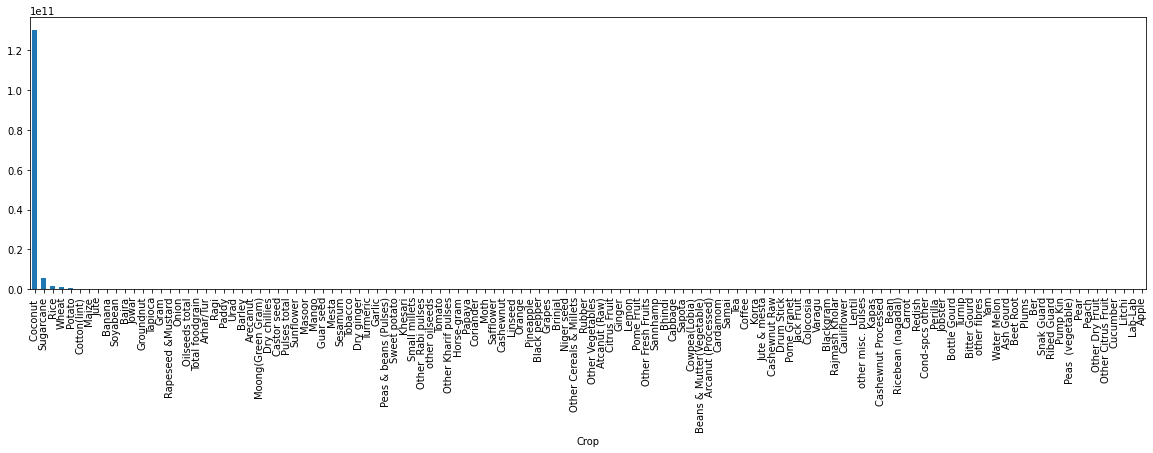

In [32]:
#plot what is the overall trend in the production of different crops? Which crops show an increasing or decreasing trend over time?
df.groupby('Crop').Production.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

#### Outlier and Anomaly Questions:

<Axes: xlabel='Production'>

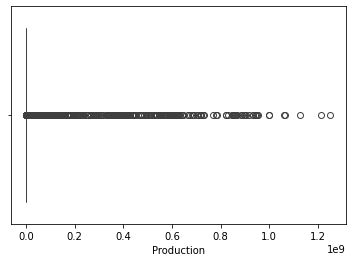

In [33]:
#Are there any outliers in crop production or cultivation area that need further investigation?
sns.boxplot(x=df['Production'])

In [34]:
#Are there any years or districts that exhibit unusual patterns in crop cultivation or production?
df.groupby('Crop_Year').Production.sum().sort_values(ascending=False).head(10)

Crop_Year
2011    1.430890e+10
2013    1.290359e+10
2006    8.681913e+09
2014    8.664541e+09
2004    8.189462e+09
2012    8.171055e+09
2005    8.043757e+09
2003    7.917974e+09
2008    7.717018e+09
2002    7.696955e+09
Name: Production, dtype: float64

<Axes: xlabel='Crop_Year'>

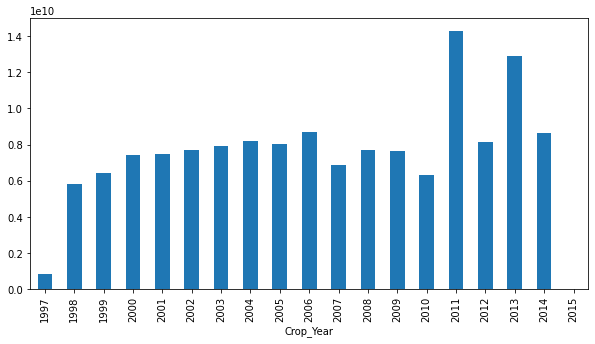

In [35]:
#plot are there any years or districts that exhibit unusual patterns in crop cultivation or production?
df.groupby('Crop_Year').Production.sum().plot(kind='bar', figsize=(10,5))